Install necessary packages


In [47]:
%pip install pandas
%pip install glob2
%pip install missingno


[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno



### Combine JSON files into single Data Frame

In [49]:
# Point to data location
path = "./scraper/data/6_23_2025/"
all_files = glob.glob(path + "*.json")

# Read all files into single dataframe
df_list = []
for file in all_files:
    df = pd.read_json(file)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True) # ignore_index resets index of combined DF to prevent index duplicates

In [50]:
# Display entire data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Display first 10 rows
combined_df.head(5)

,stockNumber,vin,year,make,model,body,trim,basePrice,originalPrice,hasPriceDrop,mileage,storeId,storeName,storeCity,state,stateAbbreviation,distance,averageRating,numberOfReviews,repairPalData,isNewArrival,isTransferable,features,highlightedFeatures,highlights,lastMadeSaleableDate,transferFee,transferTags,transferText,transferType,minEstimatedTransferDurationInDays,maxEstimatedTransferDurationInDays,transferTimesUnavailable,exteriorColor,interiorColor,normalizedExteriorColor,normalizedInteriorColor,transmission,review,numberOfFavorites,isSaleable,isComingSoon,isReserved,mpgCity,mpgHighway,originalBatteryRangeInMiles,cylinders,driveTrain,engineType,fuelType,horsepower,horsepowerRpm,engineSize,engineTorque,engineTorqueRpm,priorUseDescriptions,isAvailableToTransact,recommendationType,bestFinanceDecision,store,featureScore,vehicleSize,packages,types,series,isSavedCar,heroImageUrl,heroThumbnailImageUrl,isEVTaxCreditEligible
0,27461478,5NPEG4JA8NH134099,2022,Hyundai,Sonata,4D Sedan,SE,19998,NaN,False,56782,7298,Roswell,Roswell,Georgia,GA,2108.0,4.200000,5,NaN,False,True,"[Rear Defroster, Overhead Airbags, Auxiliary A...","Rear View Camera,Auxiliary Audio Input,Alloy W...","[singleOwner, warranty, fuelEfficient, advance...",2025-06-12T20:56:13.565Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Gray,Gray,NaN,NaN,Automatic,NaN,0,True,False,False,28.0,38.0,NaN,4,Front Wheel Drive,Gas,NaN,191.0,6100.0,2.5L,181.0,4000.0,"[{'id': 20, 'name': 'Leased Vehicle', 'descrip...",True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",3.0,NaN,[],NaN,None,False,https://img2.carmax.com/assets/27461478/hero.j...,NaN,False
1,26070459,JTDEPMAE5NJ210260,2022,Toyota,Corolla,4D Sedan,LE,20998,NaN,False,33730,7298,Roswell,Roswell,Georgia,GA,2108.0,4.500000,22,NaN,False,True,"[Power Windows, Power Locks, Air Conditioning,...","Rear View Camera,Auxiliary Audio Input,Overhea...","[warranty, fuelEfficient, advancedFeatures]",2025-06-12T20:53:33.311Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Blue,Black,NaN,NaN,Automatic,NaN,0,True,False,False,30.0,38.0,NaN,4,Front Wheel Drive,Gas,NaN,139.0,6100.0,1.8L,126.0,3900.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",7.0,NaN,[],NaN,None,False,https://img2.carmax.com/assets/26070459/hero.j...,NaN,False
2,27175122,3GCUDFE80RG128481,2024,Chevrolet,Silverado 1500,4D Crew Cab,LT Trail Boss,51998,NaN,False,58240,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,1,NaN,False,True,"[Power Locks, Auxiliary Audio Input, AM/FM Ste...","Z71 Package,4WD/AWD,Leather Seats,BOSE Sound S...","[singleOwner, advancedFeatures, premiumAudio]",2025-06-20T21:39:32.178Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Black,Black,NaN,NaN,Automatic,NaN,0,True,False,False,23.0,27.0,NaN,6,Four Wheel Drive,Diesel,NaN,305.0,3750.0,3.0L,495.0,2750.0,[],True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",10.0,NaN,"[Convenience Package, Z71 Package]",NaN,None,False,https://img2.carmax.com/assets/27175122/hero.j...,NaN,False
3,27072297,1V2WE2CA5PC229115,2023,Volkswagen,Atlas Cross Sport,4D Sport Utility,SE w/Tech,32998,NaN,False,15895,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,2,NaN,False,True,"[Alloy Wheels, 20 Inch Plus Wheels, Power Lock...","Technology Package,Leatherette Seats,Satellite...","[singleOwner, lowMiles, warranty, advancedFeat...",2025-05-28T20:50:22.353Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Black,Black,NaN,NaN,Automatic,NaN,0,True,False,False,18.0,24.0,NaN,6,Front Wheel Drive,Gas,NaN,276.0,6200.0,3.6L,266.0,3600.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",5.0,NaN,[Technology Package],NaN,None,False,https://img2.carmax.com/assets/27072297/hero.j...,NaN,False
4,27386026,58AGZ1B12MU110647,2021,Lexus,ES 350,4D Sedan,F-Sport,35998,NaN,False,2690

Explore Categorical variable options

Data Cleaning
    - handle missing values
    - handle outliers
    
Data Transformation 
    - scaling
    - normalization
    - encoding 
    
Data Splitting
    - create training and testing sets

In [51]:
# Check data type of features
combined_df.dtypes

stockNumber                int64
vin                       object
year                       int64
make                      object
model                     object
                          ...   
series                    object
isSavedCar                  bool
heroImageUrl              object
heroThumbnailImageUrl    float64
isEVTaxCreditEligible       bool
Length: 69, dtype: object

In [52]:
# Key statistics of studied variables
combined_df.describe()

,stockNumber,year,basePrice,originalPrice,mileage,storeId,distance,averageRating,numberOfReviews,repairPalData,transferFee,minEstimatedTransferDurationInDays,maxEstimatedTransferDurationInDays,normalizedExteriorColor,normalizedInteriorColor,review,numberOfFavorites,mpgCity,mpgHighway,originalBatteryRangeInMiles,cylinders,fuelType,horsepower,horsepowerRpm,engineTorque,engineTorqueRpm,recommendationType,bestFinanceDecision,featureScore,vehicleSize,types,heroThumbnailImageUrl
count,8.711800e+04,87118.000000,87118.000000,6000.000000,87118.000000,87118.000000,87118.000000,87118.000000,87118.000000,0.0,51299.000000,51299.000000,51299.000000,0.0,0.0,0.0,87118.0,83641.000000,83644.000000,3216.000000,87118.00000,0.0,82690.000000,81976.000000,82512.000000,81199.000000,0.0,0.0,78275.000000,0.0,0.0,0.0
mean,2.717417e+07,2020.133015,27154.264951,31170.838833,47292.752818,6836.857286,1603.210494,4.017579,14.774398,NaN,1554.085031,7.996023,18.868867,NaN,NaN,NaN,0.0,23.493932,30.077352,186.421331,4.59269,NaN,232.465691,5871.061957,235.152438,3443.581818,NaN,NaN,6.728815,NaN,NaN,NaN
std,3.649709e+05,2.952196,10909.109501,12141.425771,29595.639905,544.944284,815.575405,1.450467,18.221099,NaN,729.866516,2.753762,5.471971,NaN,NaN,NaN,0.0,5.962185,5.798370,126.225841,1.41678,NaN,76.875368,558.540189,92.402095,1236.750666,NaN,NaN,2.125837,NaN,NaN,NaN
min,1.386364e+07,2001.000000,3065.000000,8998.000000,16.000000,6001.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,6.000000,NaN,NaN,NaN,0.0,8.000000,13.000000,9.000000,0.00000,NaN,11.000000,1770.000000,68.000000,1000.000000,NaN,NaN,1.000000,NaN,NaN,NaN
25%,2.704489e+07,2018.000000,19998.000000,21998.000000,24536.500000,6110.000000,926.800000,4.129032,3.000000,NaN,999.000000,7.000000,17.000000,NaN,NaN,NaN,0.0,19.000000,26.000000,32.000000,4.00000,NaN,178.000000,5600.000000,176.000000,2000.000000,NaN,NaN,5.000000,NaN,NaN,NaN
50%,2.726413e+07,2021.000000,24998.000000,28998.000000,42224.500000,7128.000000,1825.500000,4.500000,9.000000,NaN,1999.000000,9.000000,21.000000,NaN,NaN,NaN,0.0,23.000000,30.000000,247.000000,4.00000,NaN,206.000000,6000.000000,221.000000,4000.000000,NaN,NaN,7.000000,NaN,NaN,NaN
75%,2.742127e+07,2022.000000,31998.000000,37998.000000,64124.750000,7209.000000,2342.800000,4.764706,20.000000,NaN,1999.000000,10.000000,22.000000,NaN,NaN,NaN,0.0,27.000000,34.000000,303.000000,6.00000,NaN,284.000000,6250.000000,270.000000,4400.000000,NaN,NaN,8.000000,NaN,NaN,NaN
max,2.765300e+07,2025.000000,99998.000000,94998.000000,756951.000000,7810.000000,2702.300000,5.000000,202.000000,NaN,1999.000000,12.000000,26.000000,NaN,NaN,NaN,0.0,129.000000,106.000000,412.000000,12.00000,NaN,760.000000,8300.000000,1200.000000,6600.000000,NaN,NaN,10.000000,NaN,NaN,NaN


## Check for Missing Values

Based on the descriptive statistics listed above, cross-referenced with the dataframe head before it, it is safe to exclude the following data from the analysis due to an overwhelming presence of NaN values:

- repairPalData
- normalizedExteriorColor
- normalizedInteriorColor
- review
- fuelType
- recommendationType
- bestFinanceDecision
- vehicleSize
- types
- heroThumbnailImageUrl


The following feature can be removed as well as it provides no useful information to the task at hand:

- numberOfFavorites
- heroImageUrl

In [53]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 

def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [54]:
# Create a new dataframe that is a copy of the original dataframe
df_copy = combined_df.copy()

# Apply missing values table method on df_copy
missing_vals = missing_values_table(df_copy)
missing_vals


Your selected dataframe has 69 columns.
There are 34 columns that have missing values.


,Missing Values,% of Total Values
heroThumbnailImageUrl,87118,100.0
vehicleSize,87118,100.0
fuelType,87118,100.0
recommendationType,87118,100.0
review,87118,100.0
bestFinanceDecision,87118,100.0
normalizedInteriorColor,87118,100.0
normalizedExteriorColor,87118,100.0
types,87118,100.0
repairPalData,87118,100.0


In [55]:


# First list of irrelevant columns to drop from the datafram based on the list above
columns_to_drop = [
    'repairPalData', 'normalizedExteriorColor', 
    'normalizedInteriorColor', 'review',
    'fuelType', 'recommendationType', 
    'bestFinanceDecision', 'vehicleSize', 
    'types', 'heroThumbnailImageUrl',
    'numberOfFavorites', 'heroImageUrl'
]

Based on the null value counts listed above, the following features can be removed from analysis due to a mjority of the data missing:

- originalPrice (roughly 90% of the data is missing)
- series (almost 90% of the data is missing)
- originalBatteryRangeInMiles (over 90% of the data is missing, probably because most of the vehicles are not electric/hybrid cars)

The following columns can also be removed due to a combinationg of having a relatively high amount of missing values and the fact that transfer fees are generally associated with vehicle transportation between different CarMax storefronts rather than the market price associated with the vehicle itself:

- minEstimatedTransferDurationInDays (about 40% of the data is missing)
- maxEstimatedTransferDurationInDays (about 40% of the data is missing)
- transferFee (about 40% of the data is missing)

Drop lastMadeSaleableDate column since it is irrelevant to the price of a car


In [56]:
# Second list of irrelevant columns listed above
columns_to_drop_2 = [
    'originalPrice', 'originalBatteryRangeInMiles', 
    'series', 'minEstimatedTransferDurationInDays',
    'maxEstimatedTransferDurationInDays', 'transferFee',
    'lastMadeSaleableDate'
]
df_copy = df_copy.drop(columns = columns_to_drop, axis = 1)
df_copy = df_copy.drop(columns = columns_to_drop_2, axis = 1)
df_copy.head()

,stockNumber,vin,year,make,model,body,trim,basePrice,hasPriceDrop,mileage,storeId,storeName,storeCity,state,stateAbbreviation,distance,averageRating,numberOfReviews,isNewArrival,isTransferable,features,highlightedFeatures,highlights,transferTags,transferText,transferType,transferTimesUnavailable,exteriorColor,interiorColor,transmission,isSaleable,isComingSoon,isReserved,mpgCity,mpgHighway,cylinders,driveTrain,engineType,horsepower,horsepowerRpm,engineSize,engineTorque,engineTorqueRpm,priorUseDescriptions,isAvailableToTransact,store,featureScore,packages,isSavedCar,isEVTaxCreditEligible
0,27461478,5NPEG4JA8NH134099,2022,Hyundai,Sonata,4D Sedan,SE,19998,False,56782,7298,Roswell,Roswell,Georgia,GA,2108.0,4.200000,5,False,True,"[Rear Defroster, Overhead Airbags, Auxiliary A...","Rear View Camera,Auxiliary Audio Input,Alloy W...","[singleOwner, warranty, fuelEfficient, advance...","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,Gray,Gray,Automatic,True,False,False,28.0,38.0,4,Front Wheel Drive,Gas,191.0,6100.0,2.5L,181.0,4000.0,"[{'id': 20, 'name': 'Leased Vehicle', 'descrip...",True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",3.0,[],False,False
1,26070459,JTDEPMAE5NJ210260,2022,Toyota,Corolla,4D Sedan,LE,20998,False,33730,7298,Roswell,Roswell,Georgia,GA,2108.0,4.500000,22,False,True,"[Power Windows, Power Locks, Air Conditioning,...","Rear View Camera,Auxiliary Audio Input,Overhea...","[warranty, fuelEfficient, advancedFeatures]","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,Blue,Black,Automatic,True,False,False,30.0,38.0,4,Front Wheel Drive,Gas,139.0,6100.0,1.8L,126.0,3900.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",7.0,[],False,False
2,27175122,3GCUDFE80RG128481,2024,Chevrolet,Silverado 1500,4D Crew Cab,LT Trail Boss,51998,False,58240,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,1,False,True,"[Power Locks, Auxiliary Audio Input, AM/FM Ste...","Z71 Package,4WD/AWD,Leather Seats,BOSE Sound S...","[singleOwner, advancedFeatures, premiumAudio]","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,Black,Black,Automatic,True,False,False,23.0,27.0,6,Four Wheel Drive,Diesel,305.0,3750.0,3.0L,495.0,2750.0,[],True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",10.0,"[Convenience Package, Z71 Package]",False,False
3,27072297,1V2WE2CA5PC229115,2023,Volkswagen,Atlas Cross Sport,4D Sport Utility,SE w/Tech,32998,False,15895,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,2,False,True,"[Alloy Wheels, 20 Inch Plus Wheels, Power Lock...","Technology Package,Leatherette Seats,Satellite...","[singleOwner, lowMiles, warranty, advancedFeat...","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,Black,Black,Automatic,True,False,False,18.0,24.0,6,Front Wheel Drive,Gas,276.0,6200.0,3.6L,266.0,3600.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",5.0,[Technology Package],False,False
4,27386026,58AGZ1B12MU110647,2021,Lexus,ES 350,4D Sedan,F-Sport,35998,False,26900,7298,Roswell,Roswell,Georgia,GA,2108.0,4.333333,6,False,True,"[Power Windows, Traction Control, ABS Brakes, ...","Leatherette Seats,Pioneer Sound System,Parking...","[singleOwner, lowMilesPerYear, warranty, advan...","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,Black,Red,Automatic,True,False,False,22.0,31.0,6,Front Wheel Drive,Gas,302.0,6600.0,3.5L,267.0,4700.0,"[{'id': 20, 'name': 'Leased Vehicle', 'descrip...",True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",7.0,[],False,False


## Exploratory Analysis of Missing Values

(based on table output above)

Following imputations could be made regarding body:

- 1FTEW1EG0JFA30274 => body needs to be 4D Crew Cab
- KMHRC8A30RU327375 => isComingSoon is True so a lot of information is missing about the car

Following imputations need to be made regarding transmission:

- KMHRC8A30RU327375 => isComingSoon is True so a lot of information is missing about the car

Following imputations need to be made regarding transferType & transferText:

- JN1FV7AR9GM451502 => shipping prices, on hold tag, shipping from, coming-soon 


In [59]:
print("DataFrame Shape:", df_copy.shape)


DataFrame Shape: (87118, 50)


Still need to figure out how to deal with remaining null values in the following columns:

- body ==========================> 2
- trim ==========================> 7444
- transferText ==================> 1
- transferType ==================> 1
- exteriorColor =================> 55
- interiorColor =================> 83
- transmission ==================> 1
- mpgCity =======================> 3477
- mpgHighway ====================> 3474
- driveTrain ====================> 266
- engineType ====================> 2
- horsepower ====================> 4428
- horsepowerRpm =================> 5142
- engineSize ====================> 11
- engineTorque ==================> 4606
- engineTorqueRpm ===============> 5919
- featureScore ==================> 8843

We may be able to assume that certain features are tied to electric vehicles (such as the mpgCity and mpgHighway)

It might be beneficial to put EVs into a separate dataframe and conduct a separate EDA.

Its possible that the "null" trims are just Base Trims for the models in question: Might be best to interpolate this with the value of "Base"
    - can check if Base Trims exist as its own standalone

The null featureScores might be able to be changed to 0s since the cars may have no available features

## Remove Duplicate Rows

In [60]:
# Check rows with duplicate VINS and drop
df_unique = df_copy.drop_duplicates(subset=['vin'], keep='first')
print("Unique DataFrame Shape:", df_unique.shape)

Unique DataFrame Shape: (86161, 50)


957 Duplicate Rows removed

## MissingNo Package

### Missingno Barplot

<Axes: >

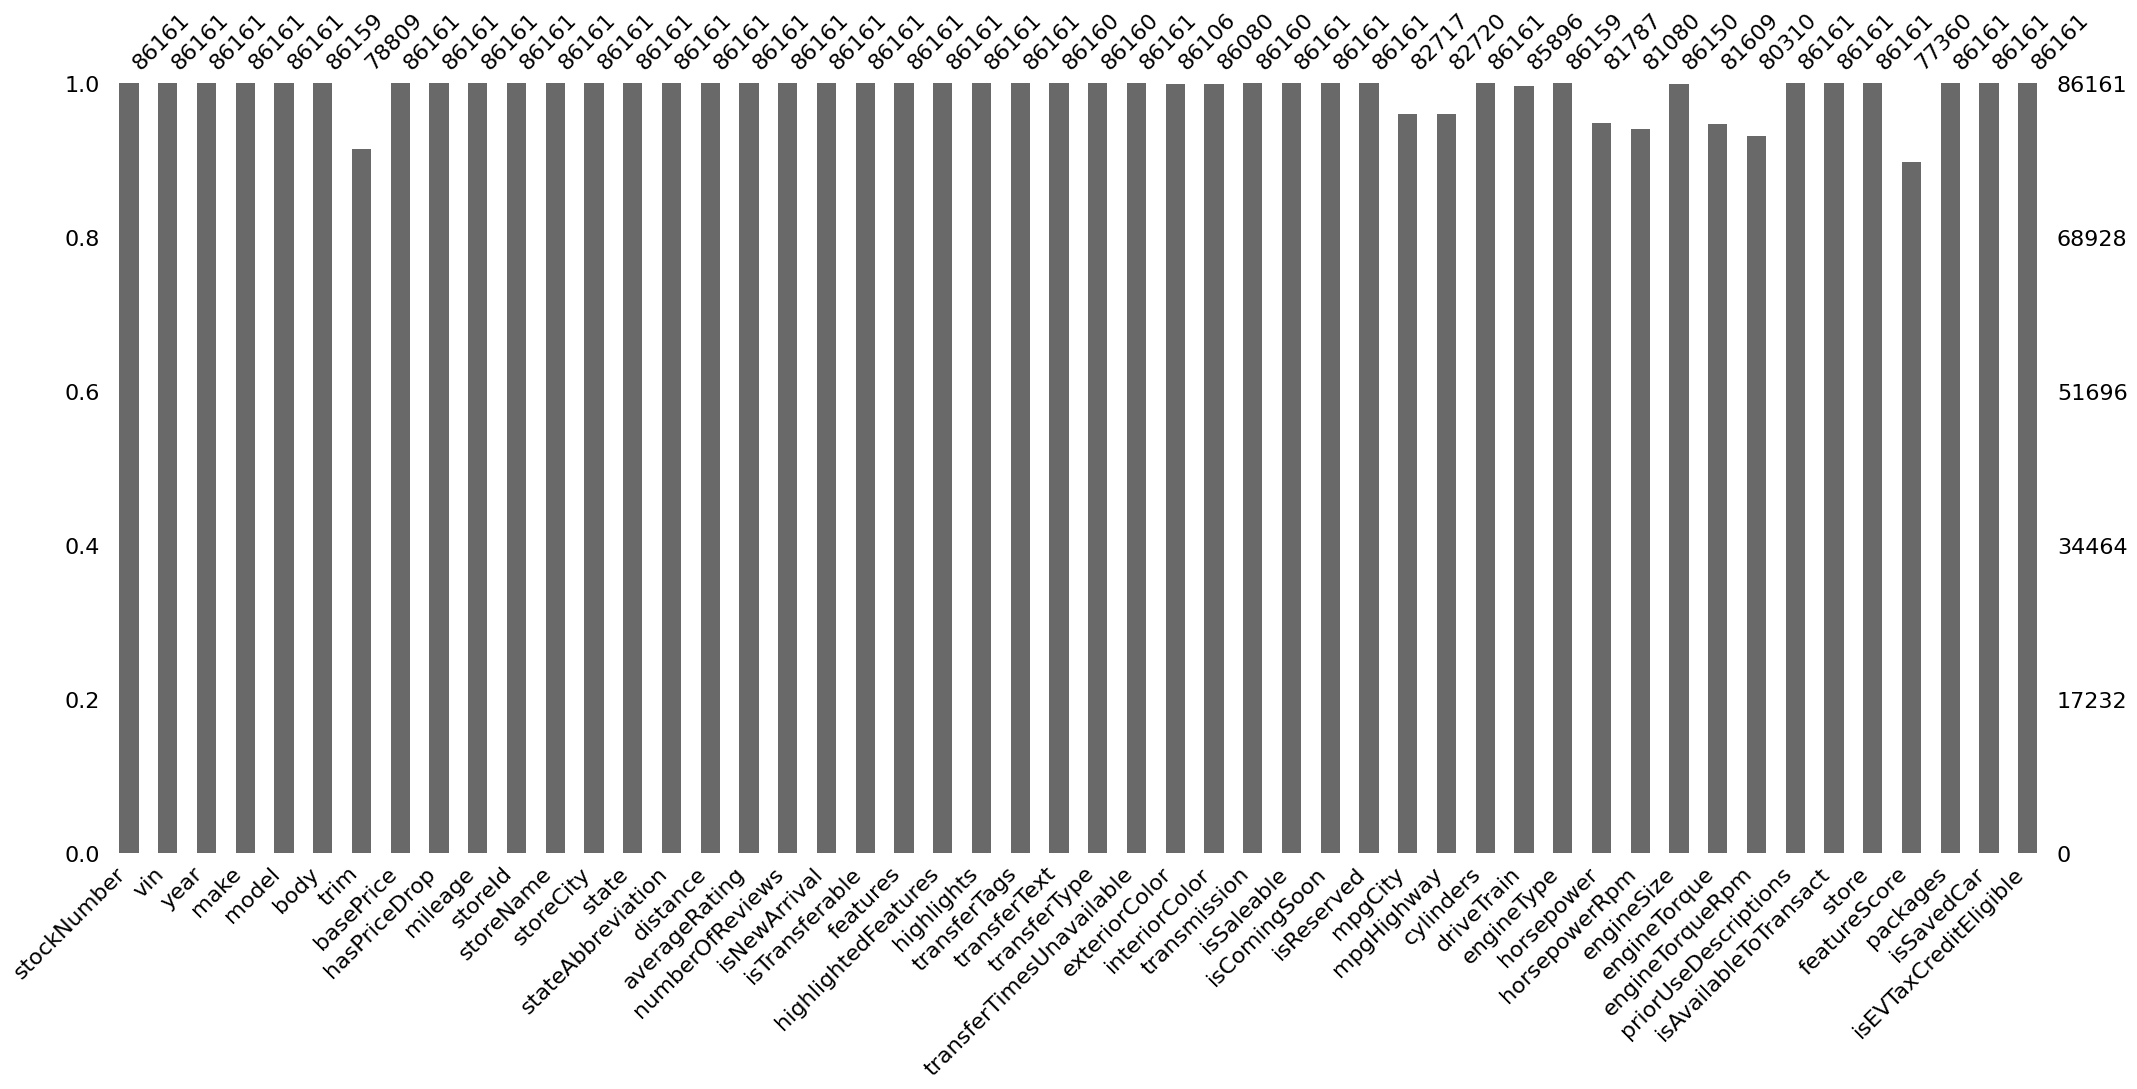

In [61]:
# Create Bar Plot with Missingno library
msno.bar(df_unique)

### Missingno Matrices

This gives a graphical representation of what was essentially shown in the missing values table prior to this

<Axes: >

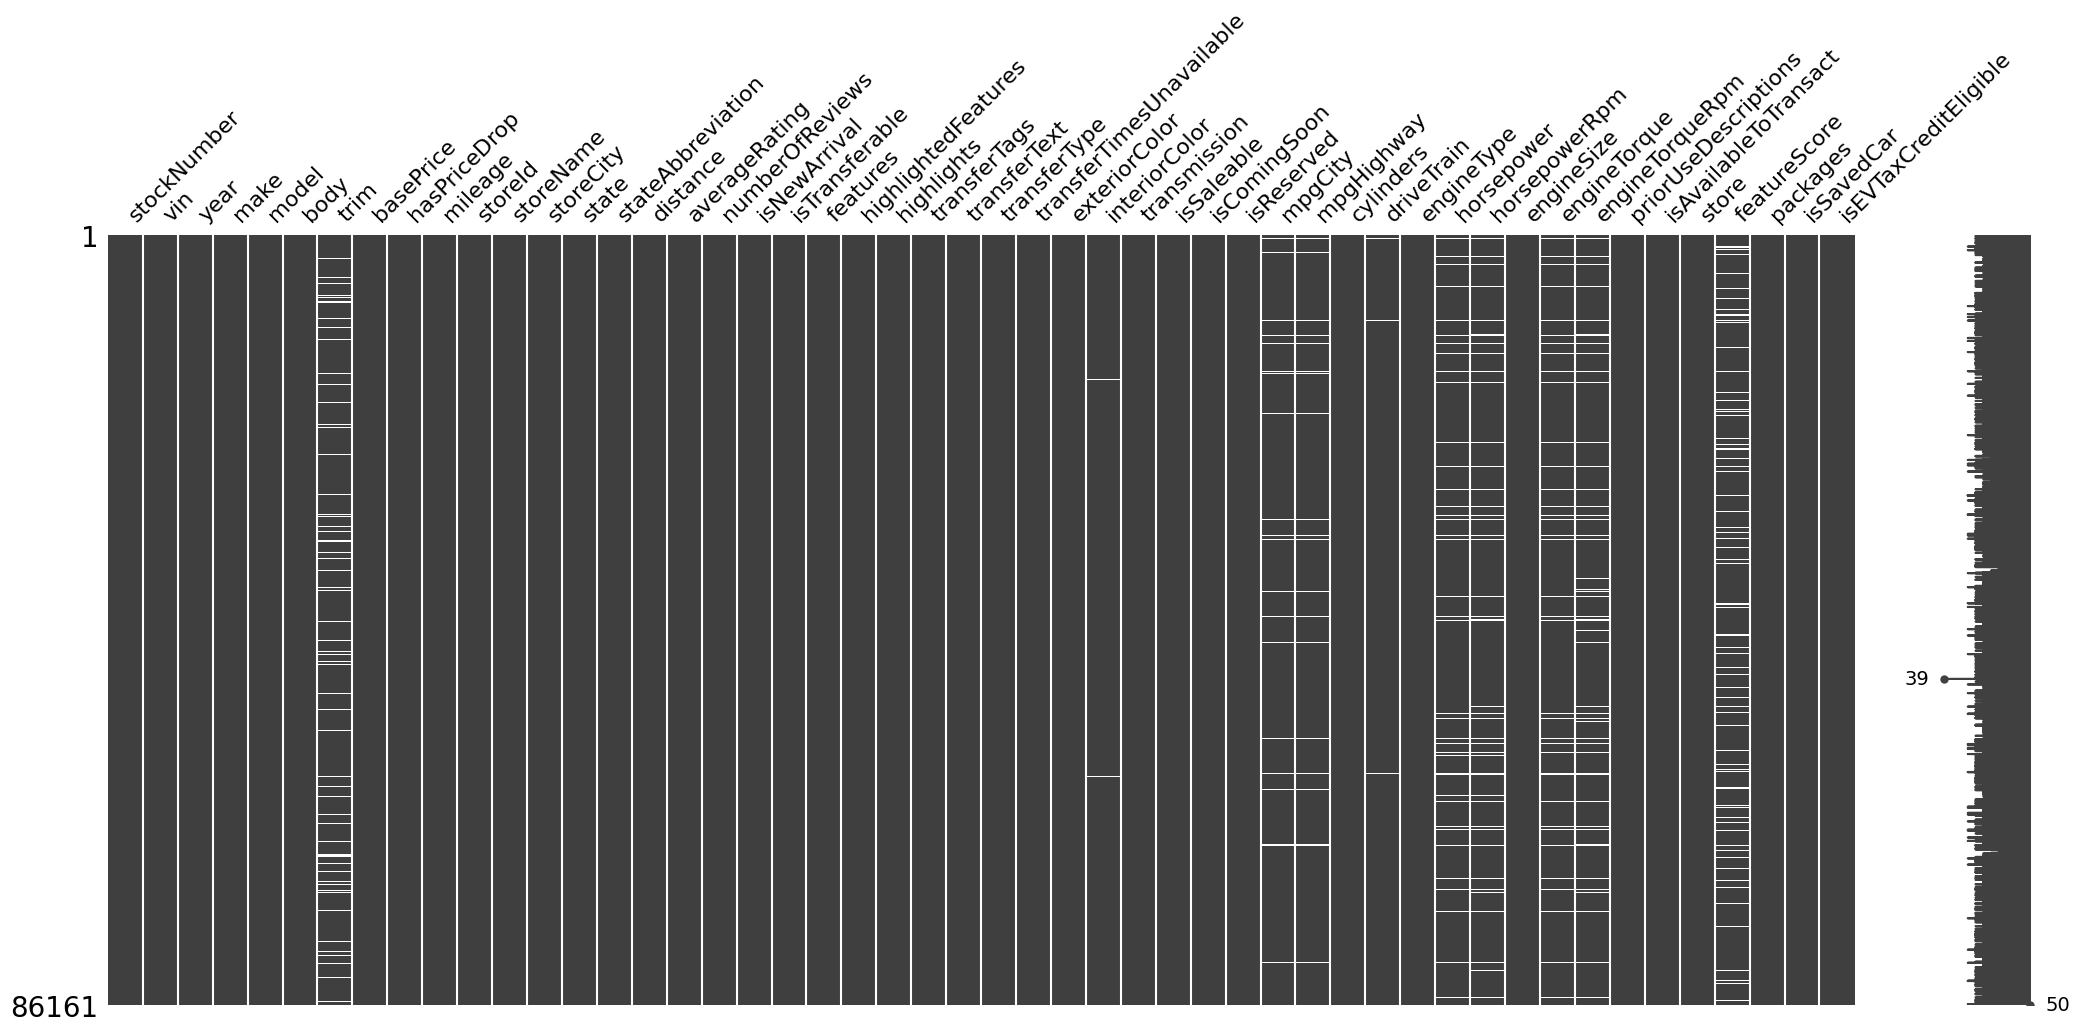

In [62]:
# Use Missingno matrix method to check for missing values relative to the entire dataset
msno.matrix(df_unique)

The line on the right of the visualization:
- illustrates the general shape of the data (aka its completeness)
- marks which row has the least amount of null values
- shows the total number of columns in the dataset

Variable with very little missing values can be consider Missing Completely At Random (MCAR)

Variables with a lot of missing values can be considered Missing At Random (MAR) or potentially Missing Not At Random (MNAR)

The Missingno package lets us sort by column to check if missing vlues are correlated to one another

<Axes: >

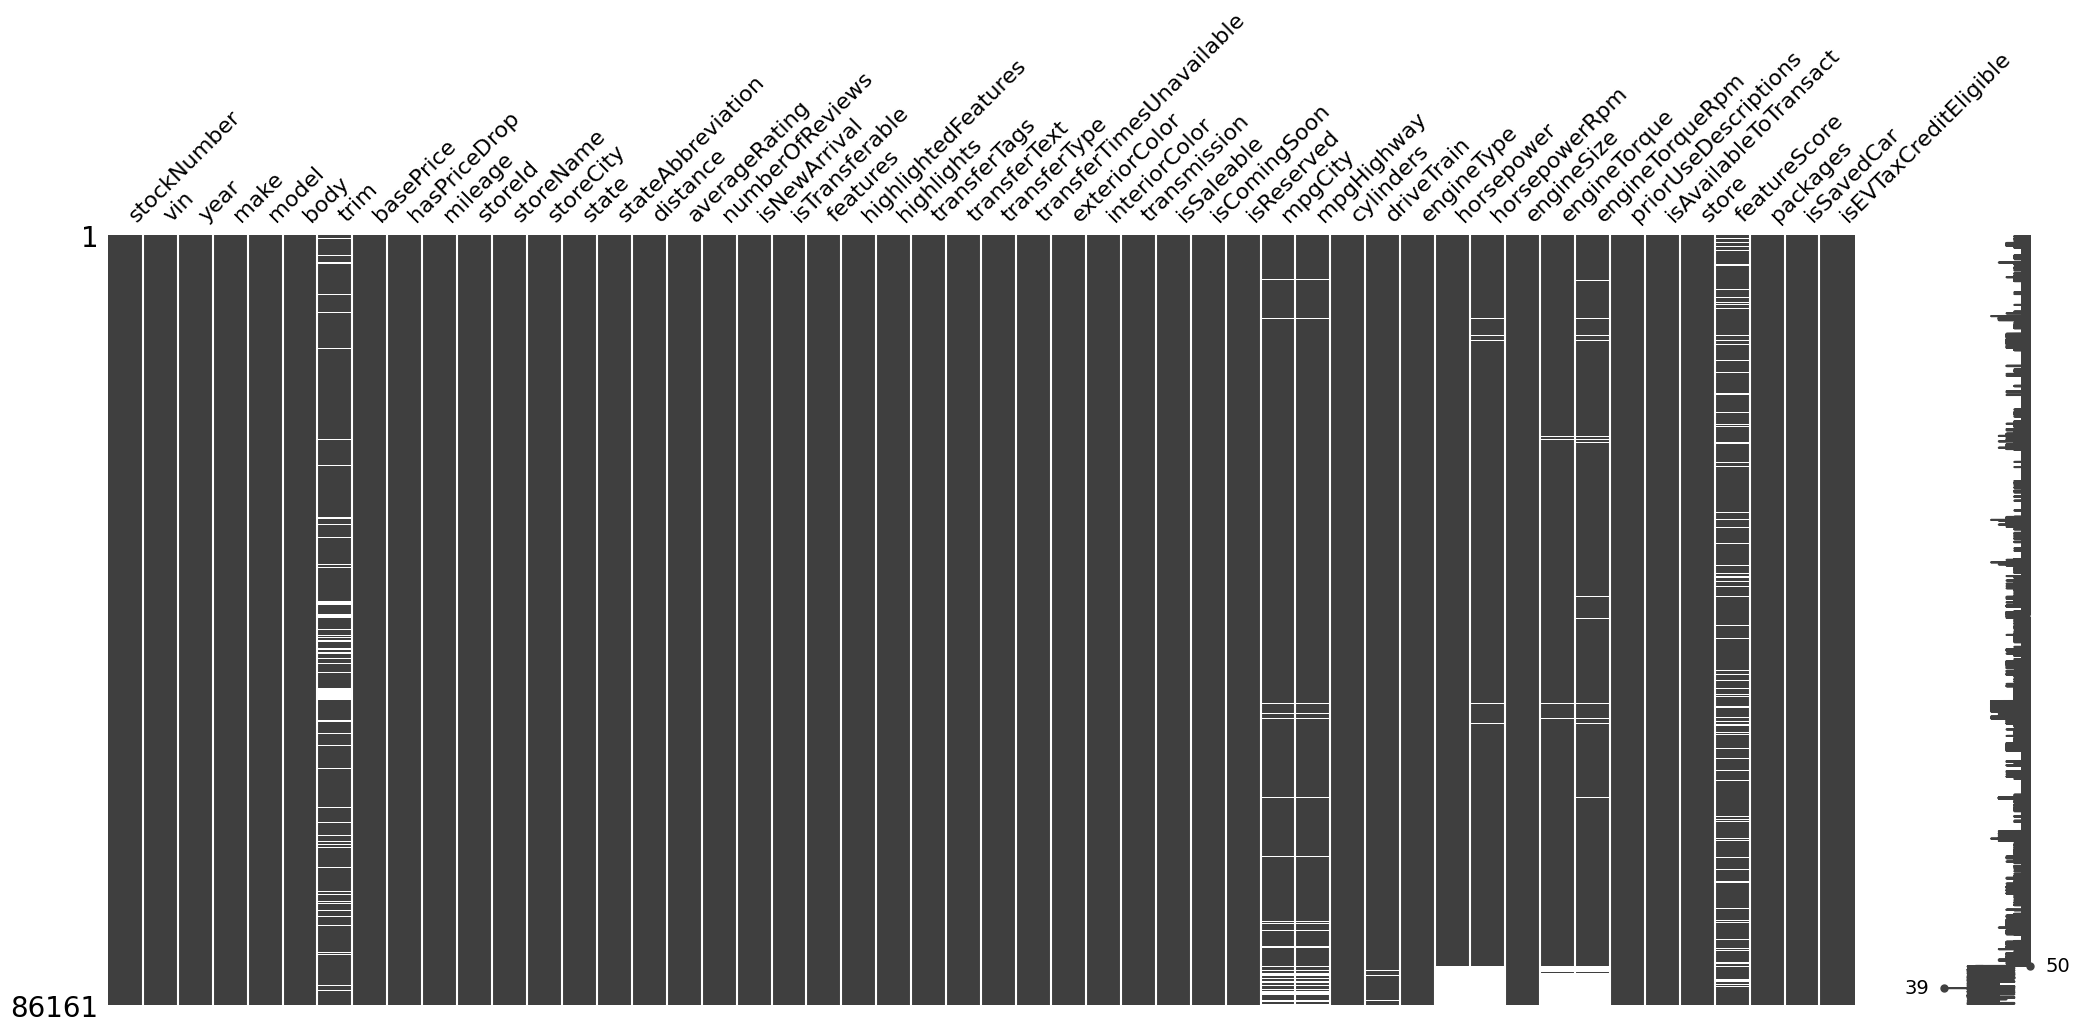

In [63]:
# Trying out the sort function on Horsepower
sorted = df_unique.sort_values('horsepower')
msno.matrix(sorted)

Sorting by the feature horsepower illustrates missing values in this feature are correlated with the following columns:
- horsepowerRpm
- engineTorque
- engineTorqueRpm

The horsepower feature also seems to be faintly correlated with the following columns as well:
- mpgCity
- mpgHighway

<Axes: >

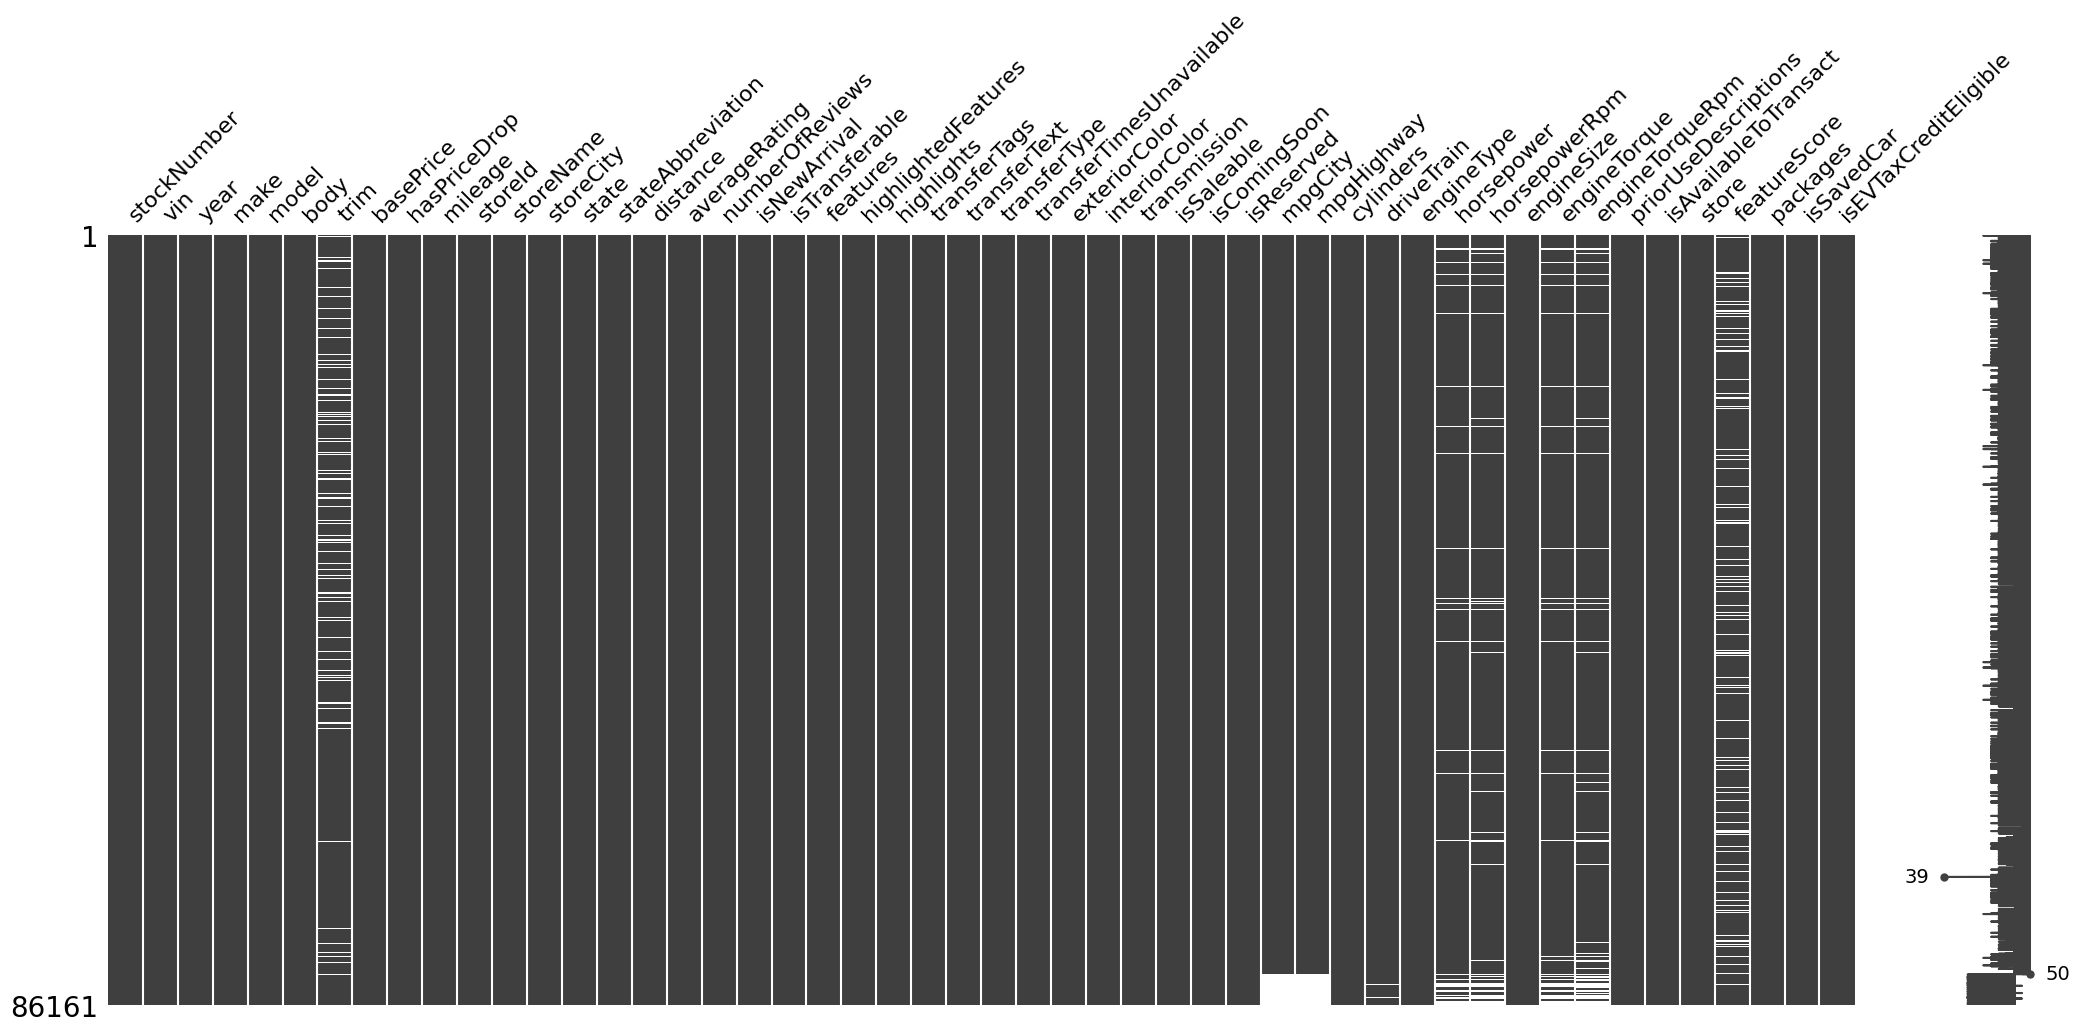

In [64]:
# Trying out the sort function on featureScore
sorted = df_unique.sort_values('mpgCity')
msno.matrix(sorted)

It appears that mpgCity and mpgHighway missing values are correlated to one another and that columns iwth missing values under 1% rarely show up on the null matrix plots:

- interiorColor
- exteriorColor
- engineSize
- engineType
- body
- transmission
- transferType
- transferText

It can be argued that these features have null values that are Missing Completely At Random (MCAR) due to the lack of visualization

The missing values in these features can be handled by:
- dropping the rows completely (since they account for such a small portion of the data)
- imputation (this may be unnecessary BUT the missing values could be brand specific in cases other than:
    - engineType
    - body
    - transmission
    - transferType
    - transferText)

In [65]:
# Drop the rows of features with very low missing values
# Drop rows which have any missing values for engineType, body, transmission, transferType, transferText columns
print("DataFrame Shape Before Dropping Rows:", df_unique.shape)

df_unique.dropna(subset=['engineType', 'body', 'transmission', 'transferType', 'transferText'],how='any',inplace=True)

print("DataFrame Shape After Dropping Rows:", df_unique.shape)

DataFrame Shape Before Dropping Rows: (86161, 50)
DataFrame Shape After Dropping Rows: (86156, 50)


/var/folders/t6/cjn4y6mx6lj46_h4_hhsk7740000gn/T/ipykernel_43608/3903047950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.dropna(subset=['engineType', 'body', 'transmission', 'transferType', 'transferText'],how='any',inplace=True)


Only 5 rows were dropped which is statistically insignificant to the analysis at hand

### Missingno Heatmap

<Axes: >

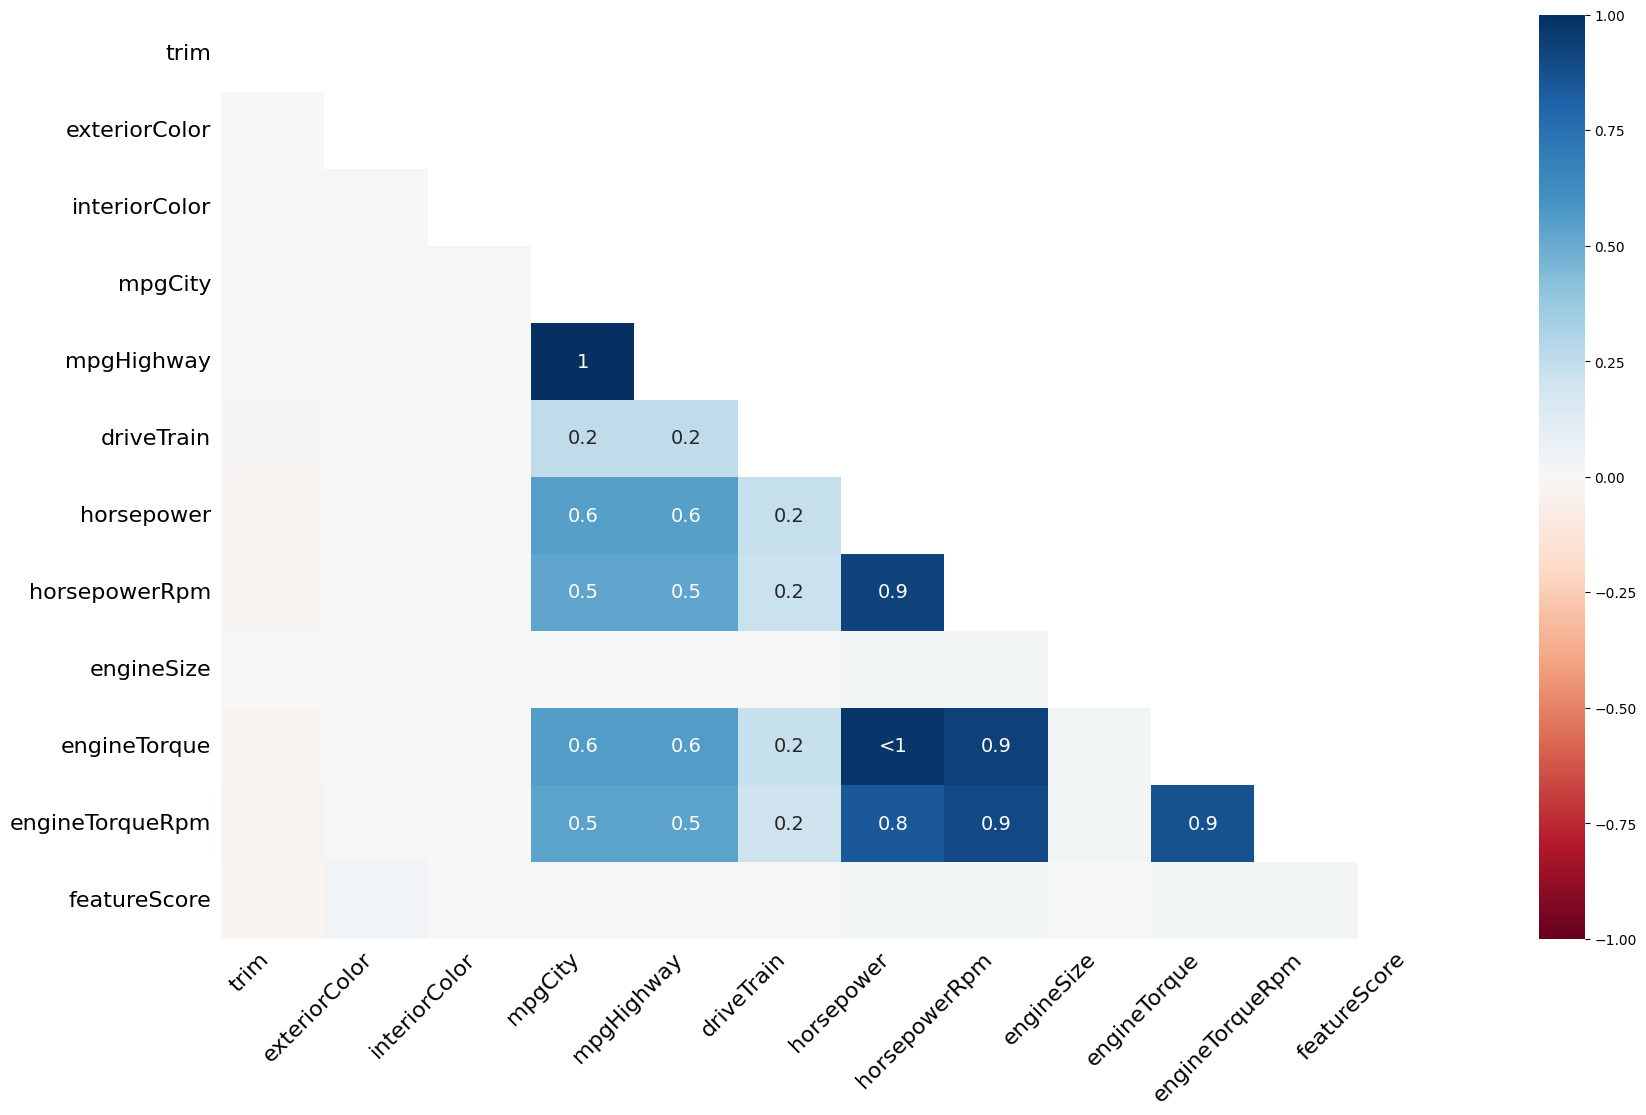

In [66]:
# Create heatmap of missing values
msno.heatmap(df_unique)

#### Create Dataframe for the missing mpgCity and mpgHighway columns

I think that these cars are electric so they have missing values for those fields

In [77]:
# Check null values for body
# null_df = df_copy[df_copy['exteriorColor'].isnull()]

# null_df.head(10)

mpgDfNotElectric = df_copy[(df_copy['mpgCity'].isnull()) & (df_copy['engineType'] != 'Electric')]

print("MpgDfNotElectric Shape:", mpgDfNotElectric.shape)

mpgDfElectric = df_copy[(df_copy['mpgCity'].isnull()) & (df_copy['engineType'] == 'Electric')]

print("MpgDfElectric Shape:", mpgDfElectric.shape)

electricDf = df_copy[df_copy['engineType'] == 'Electric']

print("electricDf Shape:", electricDf.shape)

electricDf.head(10)

MpgDfNotElectric Shape: (1325, 50)
MpgDfElectric Shape: (2152, 50)
electricDf Shape: (2153, 50)


,stockNumber,vin,year,make,model,body,trim,basePrice,hasPriceDrop,mileage,storeId,storeName,storeCity,state,stateAbbreviation,distance,averageRating,numberOfReviews,isNewArrival,isTransferable,features,highlightedFeatures,highlights,transferTags,transferText,transferType,transferTimesUnavailable,exteriorColor,interiorColor,transmission,isSaleable,isComingSoon,isReserved,mpgCity,mpgHighway,cylinders,driveTrain,engineType,horsepower,horsepowerRpm,engineSize,engineTorque,engineTorqueRpm,priorUseDescriptions,isAvailableToTransact,store,featureScore,packages,isSavedCar,isEVTaxCreditEligible
39,27385895,YV4ED3UR2M2567175,2021,Volvo,XC40 Recharge Electric,4D Sport Utility,P8 R-Design,28998,False,30697,7298,Roswell,Roswell,Georgia,GA,2108.0,0.000000,0,False,True,"[Power Seat(s), Front Seat Heaters, Navigation...","4WD/AWD,Leather & Suede Seats,Satellite Radio ...","[lowMilesPerYear, warranty, advancedFeatures]","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,Black,Black,Automatic,True,False,False,NaN,NaN,0,All Wheel Drive,Electric,NaN,NaN,0.0L,NaN,NaN,[],True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",8.0,[],False,False
83,26814842,1FADP3R40EL341415,2014,Ford,Focus Electric,4D Hatchback,None,10599,False,60633,7298,Roswell,Roswell,Georgia,GA,2108.0,0.000000,0,False,True,"[Power Locks, Power Windows, CD Audio, Auxilia...","Leatherette Seats,Parking Sensors,Rear View Ca...","[singleOwner, lowMilesPerYear, advancedFeature...","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,White,White,Automatic,True,False,False,NaN,NaN,0,Front Wheel Drive,Electric,NaN,NaN,0.0L,NaN,NaN,[],True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",8.0,[],False,True
164,26884360,WB523CF04RCN03952,2024,BMW,iX,4D Sport Utility,XDrive50i,55998,False,31460,7298,Roswell,Roswell,Georgia,GA,2108.0,0.000000,0,False,True,"[Power Windows, Skylight(s), Power Locks, Auxi...","Luxury Package,Premium Package,Convenience Pac...","[singleOwner, warranty, advancedFeatures, prem...","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,Black,Black,Automatic,True,False,False,NaN,NaN,0,All Wheel Drive,Electric,NaN,NaN,0.0L,NaN,NaN,[],True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",9.0,"[Driver Assistance Package, Premium Package, C...",False,False
214,27443063,5YJ3E1EA5LF611475,2020,Tesla,Model 3,4D Sedan,Standard Range Plus,22998,False,54531,7298,Roswell,Roswell,Georgia,GA,2108.0,4.722222,18,False,False,"[Power Locks, Skylight(s), Auxiliary Audio Inp...","Leatherette Seats,Skylight(s),Parking Sensors,...",[advancedFeatures],[],Coming soon to,coming-soon,False,Gray,Black,Automatic,False,True,False,NaN,NaN,0,Rear Wheel Drive,Electric,NaN,NaN,0.0L,NaN,NaN,"[{'id': 20, 'name': 'Leased Vehicle', 'descrip...",False,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",NaN,[],False,False
267,26817950,5YJYGDEE2MF298830,2021,Tesla,Model Y,4D Sport Utility,Long Range,27998,False,49776,7298,Roswell,Roswell,Georgia,GA,2108.0,4.800000,10,False,False,"[ABS Brakes, Memory Seat(s), Front Seat Heater...","4WD/AWD,Leatherette Seats,Parking Sensors,Rear...","[warranty, advancedFeatures]",[],Reserved at,on-hold,False,White,Black,Automatic,False,False,True,NaN,NaN,0,All Wheel Drive,Electric,NaN,NaN,0.0L,NaN,NaN,[],False,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",8.0,[],False,False
291,27308250,KM8KN4AE3NU071264,2022,Hyundai,Ioniq 5,4D Sport Utility,SEL,24879,False,56771,7298,Roswell,Roswell,Georgia,GA,2108.0,4.857143,7,False,False,"[Alloy Wheels, Android Auto, Lane Departure Wa...","Leatherette Seats,Satellite Radio Ready,Parkin...","[singleOwner, warranty, advancedFeatures]",[],Reserved at,on-hold,False,White,White,Automatic,False,False,True,NaN,NaN,0,Rear Wheel Drive,Electric,NaN,NaN,0.0L,NaN,NaN,[],False,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",5.0,[],False,True
304,27312346,7FCTGBAA7PN028588,2023,Rivian,R1T,4D Crew Cab,Adventure Performance Dual-Motor Max,70998,False,7401,7298,Roswell,Roswell,Georgia,GA,2108.0,0.000000,0,False,Fal

In [78]:
# Apply missing values table method on electricDf
missing_vals_electric = missing_values_table(electricDf)
missing_vals_electric

Your selected dataframe has 50 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
mpgCity,2152,100.0
mpgHighway,2152,100.0
horsepower,2152,100.0
horsepowerRpm,2152,100.0
engineTorque,2152,100.0
engineTorqueRpm,2152,100.0
featureScore,324,15.0
driveTrain,247,11.5
trim,191,8.9
interiorColor,2,0.1


## Random EDA

Ignore for now

In [67]:
# Test to see if I can get dataframe of nulls

# Create a boolean mask where True indicates a null value in any column of that row
null_mask = df_unique.isnull().any(axis=1)

# Create a new DataFrame containing only the rows with null values
df_null_rows = df_unique[null_mask]

print("\nDataFrame with rows containing null values:")
df_null_rows.head(10)

print("DataFrame Shape:", df_null_rows.shape)



DataFrame with rows containing null values:
DataFrame Shape: (21289, 50)


<Axes: >

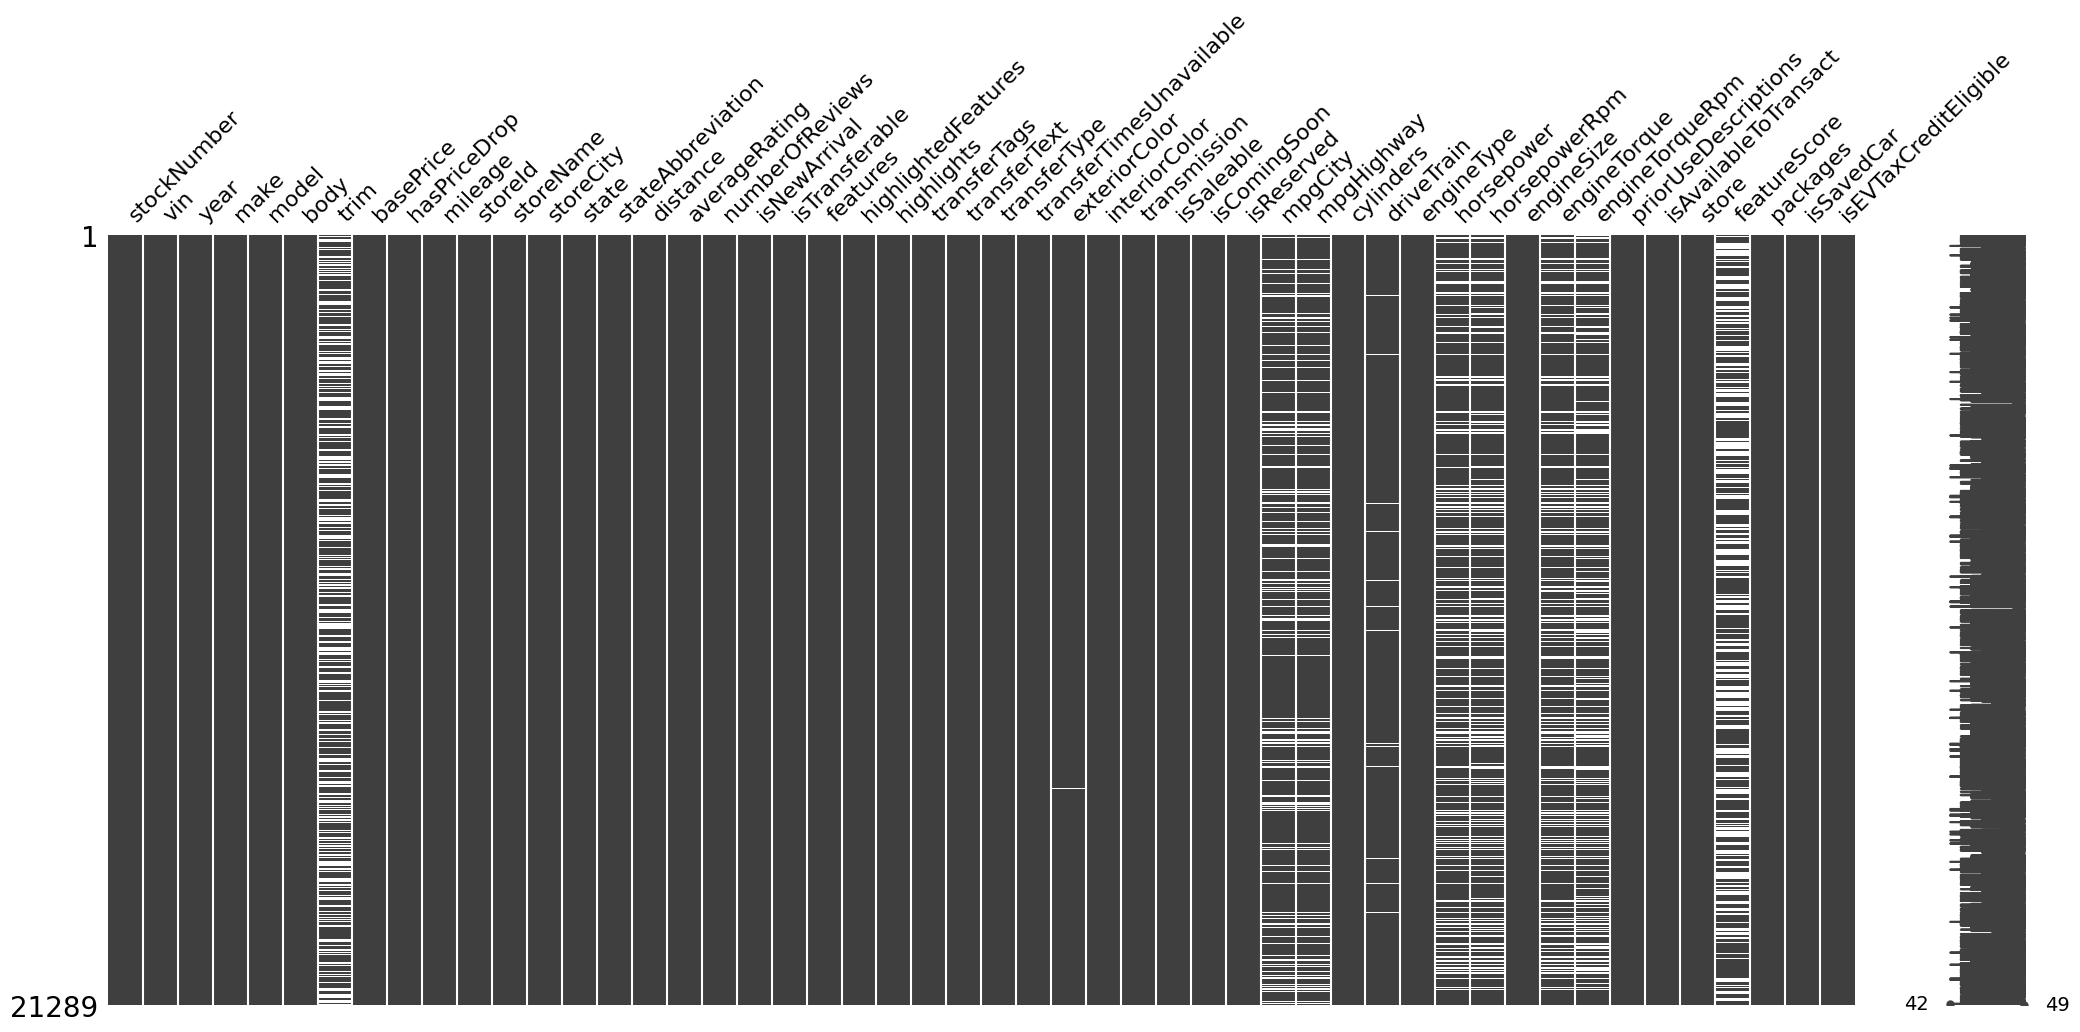

In [68]:
#  Use Missingno matrix method to check for missing values relative to the entire dataframe of null rows
msno.matrix(df_null_rows)

The line on the right of the visualization:
- illustrates the general shape of the data (aka its completeness)
- marks which row has the least amount of null values
- shows the total number of columns in the dataset



Make a method to get the distribution of values for each feature containing null values

In [69]:
# Create a dataframe with null value rows removed

# Create copy of df_unique
df_unique_copy = df_unique.copy()

# Remove rows with any null value
df_unique_cleaned = df_unique_copy.dropna()
# print(df_unique_cleaned)

In [70]:
categorical_columns = [
    'body',
    'transferText', 'transferType', 'exteriorColor',
    'interiorColor', 'transmission', 'mpgCity',
    'mpgHighway', 'driveTrain', 'engineType',
    'horsepower', 'horsepowerRpm', 'engineSize',
    'engineTorque', 'engineTorqueRpm', 'featureScore'
]

for column in categorical_columns:
    plt.figure(figsize = (20, 8))
    sns.countplot(x = column, data=df_unique_cleaned, order = sorted(df_unique_cleaned[column].unique()))
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation = 45, ha = 'right')
    plt.tight_layout()
    plt.show()

TypeError: 'DataFrame' object is not callable

<Figure size 2000x800 with 0 Axes>